In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/train_data_cleaned.csv")
df.head()

,Customer_ID,outlet_city_0,outlet_city_1,outlet_city_2,outlet_city_3,outlet_city_4,luxury_sales,fresh_sales,dry_sales,cluster_category
0,10493832.0,0,0,0,0,1,1209.60,756.00,5292.00,4
1,10178643.0,0,0,0,1,0,1590.12,1060.08,6007.12,1
2,10513916.0,0,0,0,1,1,2288.88,1481.04,9155.52,4
3,10334589.0,0,0,0,1,1,2274.94,1739.66,9099.76,4
4,10458365.0,0,0,0,0,1,2345.49,2069.55,9243.99,4


In [4]:
# traindf splitting to train_test_split
from sklearn.model_selection import train_test_split


# Splitting the data
X = df.drop(columns=["Customer_ID", "cluster_category"])
y = df["cluster_category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
print(X_train)

        outlet_city_0  outlet_city_1  outlet_city_2  outlet_city_3  \
227823              0              0              1              1   
153404              0              0              0              1   
227284              0              0              1              0   
147557              0              1              0              0   
617148              0              1              0              1   
...               ...            ...            ...            ...   
259178              0              0              0              0   
365838              0              1              0              1   
131932              0              1              0              1   
671155              0              1              1              1   
121958              0              0              1              1   

        outlet_city_4  luxury_sales  fresh_sales  dry_sales  
227823              1        984.20      4780.40    1195.10  
153404              1       1765.67

In [6]:
print(X_test)

        outlet_city_0  outlet_city_1  outlet_city_2  outlet_city_3  \
473136              0              1              1              1   
725244              1              0              0              0   
49503               0              0              0              1   
168094              0              0              1              0   
283812              0              0              1              1   
...               ...            ...            ...            ...   
366907              1              0              0              1   
233952              0              0              0              0   
494082              0              1              0              1   
686537              0              1              1              0   
104473              0              1              0              0   

        outlet_city_4  luxury_sales  fresh_sales  dry_sales  
473136              0       2647.35      3176.82   12354.30  
725244              1       2754.04

In [7]:
print(y_train)

227823    2
153404    4
227284    2
147557    4
617148    6
         ..
259178    2
365838    1
131932    4
671155    6
121958    4
Name: cluster_category, Length: 517361, dtype: int64


In [8]:
print(y_test)

473136    1
725244    3
49503     4
168094    4
283812    2
         ..
366907    1
233952    2
494082    1
686537    6
104473    4
Name: cluster_category, Length: 221727, dtype: int64


In [9]:
#Robust scaling
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
#model training with KNN method
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=32)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=32)

In [11]:
# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report

y_test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9997654773663108


In [12]:
y_train_pred = knn.predict(X_train)

# Calculating accuracy for the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9997796509593881


In [13]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     56972
           2       1.00      1.00      1.00     46367
           3       1.00      1.00      1.00      7277
           4       1.00      1.00      1.00     51589
           5       1.00      1.00      1.00      8789
           6       1.00      1.00      1.00     50733

    accuracy                           1.00    221727
   macro avg       1.00      1.00      1.00    221727
weighted avg       1.00      1.00      1.00    221727



In [14]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    132007
           2       1.00      1.00      1.00    108693
           3       1.00      1.00      1.00     16835
           4       1.00      1.00      1.00    120843
           5       1.00      1.00      1.00     20507
           6       1.00      1.00      1.00    118476

    accuracy                           1.00    517361
   macro avg       1.00      1.00      1.00    517361
weighted avg       1.00      1.00      1.00    517361



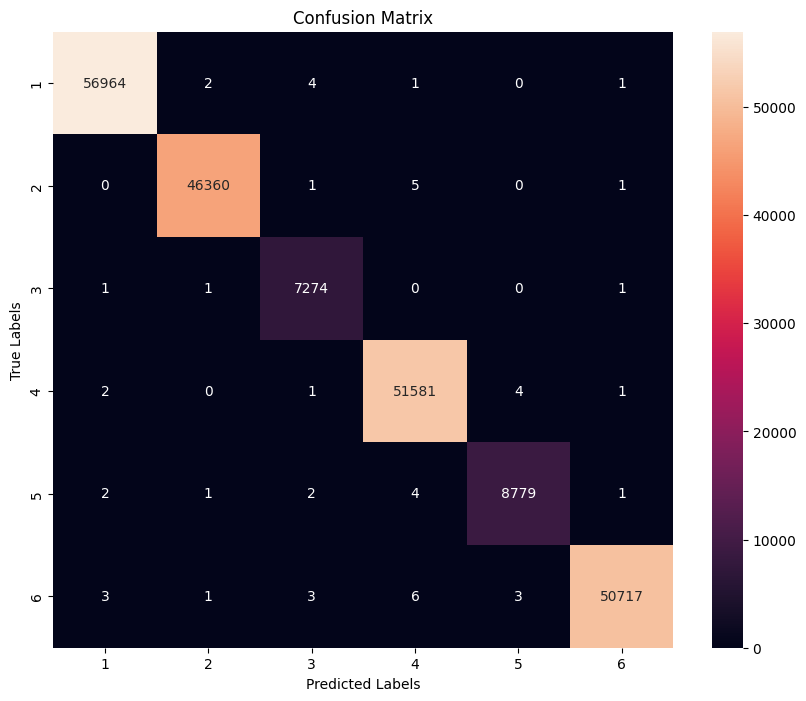

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred, labels=knn.classes_)
labels = knn.classes_

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

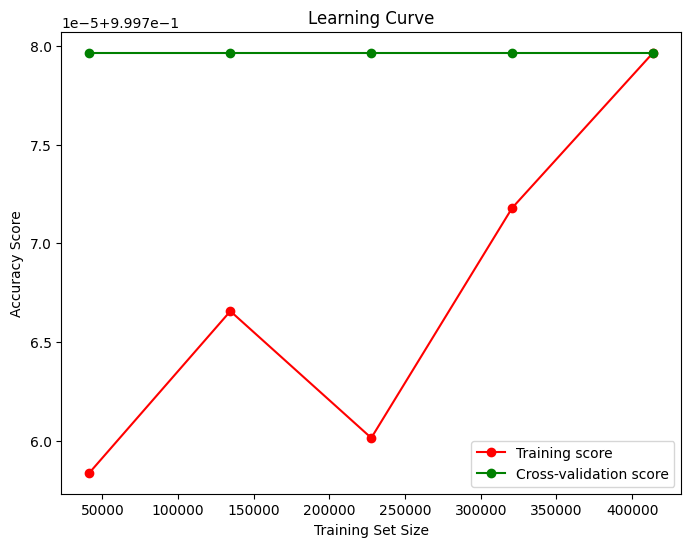

In [17]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(knn, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

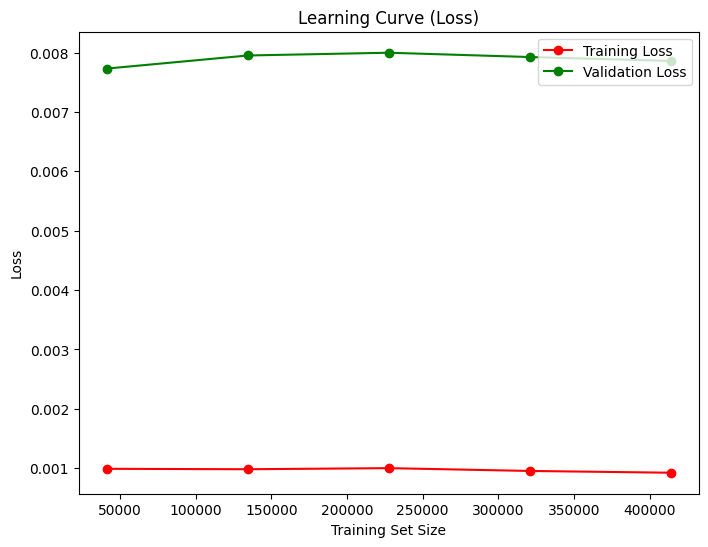

In [18]:
train_sizes, train_scores, test_scores = learning_curve(
    knn,
    X_train,
    y_train,
    cv=5,
    scoring='neg_log_loss',  # Use 'neg_log_loss' for loss curve
    n_jobs=-1
)

# Calculate the average loss for training and validation sets
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Negate the loss values to get the actual loss
train_loss = -train_mean
validation_loss = -test_mean

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_loss, 'o-', color="r", label="Training Loss")
plt.plot(train_sizes, validation_loss, 'o-', color="g", label="Validation Loss")

plt.xlabel("Training Set Size")
plt.ylabel("Loss")  # Changed y-axis label to "Loss"
plt.title("Learning Curve (Loss)")  # Updated title
plt.legend(loc="upper right")  # Adjusted legend location for loss curves
plt.show()

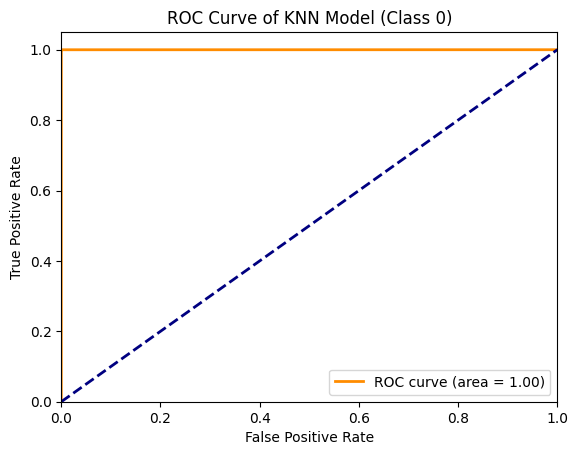

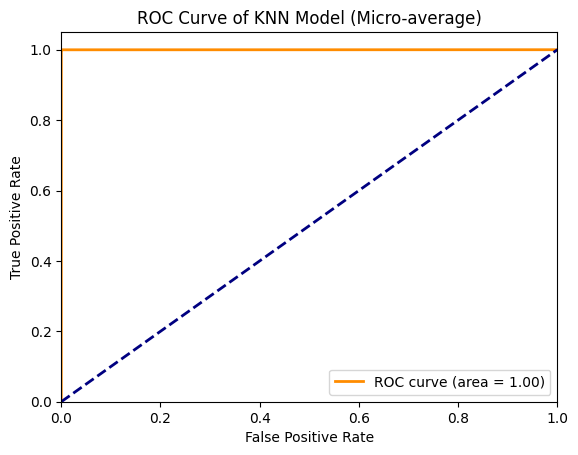

In [20]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the target variable for multiclass ROC curve
y_test_bin = label_binarize(y_test, classes=knn.classes_)
n_classes = y_test_bin.shape[1]

# Get predicted probabilities for each class
y_probs = knn.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for a specific class (e.g., class 0)
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of KNN Model (Class 0)')
plt.legend(loc="lower right")
plt.show()

# Plot micro-average ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of KNN Model (Micro-average)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 1. Calculate training and validation/test accuracies
train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)

# 2. Create a range of data points for the x-axis (e.g., representing sample size or complexity)
data_points = np.arange(1, len(y_test) + 1)

# 3. Plot the training and validation/test accuracies
plt.plot(data_points, [train_accuracy] * len(data_points), label='Training Accuracy')
plt.plot(data_points, [test_accuracy] * len(data_points), label='Validation/Test Accuracy')

# 4. Customize the plot
plt.xlabel('Data Points')
plt.ylabel('Accuracy')
plt.title('Model Performance (Underfitting/Overfitting)')
plt.legend()
plt.show()